In [1]:
import os
import numpy as np
import sys
BASE_DIR = '/home/aqts/yangHong/first-spam-experiment/'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
#get text email dataset, which is equal to the image email datset
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'data/hybrid_email_dataset_equal/text/')
print(TEXT_DATA_DIR)
MAX_SEQUENCE_LENGTH = 500
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 200

nb_filters = 256
hiden_lstm_layer = 256

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.200d.txt'), encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {'ham':0, 'spam':1}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
                        
count = 0
for folder in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, folder)
    for fname in sorted(os.listdir(path)):
        if fname is not None:
            fpath = os.path.join(path, fname)
            args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
            with open(fpath, **args) as f:
                t = f.read()
                i = t.find('Subject:')  # skip header
                if 0 < i:
                    t = t[i:]
                texts.append(t)
                count+=1
                print(count,":",t[0:30])
            if folder =='ham':
                labels.append(0)
                print('ham')
            else:
                labels.append(1)
                print('spam')
# print('Process text dataset done')
# print('count:',count)

/home/aqts/yangHong/first-spam-experiment/data/hybrid_email_dataset_equal/text/
Indexing word vectors.
Found 400000 word vectors.
Processing text dataset
1 : Subject: palm pilot request
je
ham
2 : Subject: invoice processing
as
ham
3 : Subject: north baja project
ac
ham
4 : Subject: long term outlook
fyi
ham
5 : Subject: account assignment li
ham
6 : Subject: pg & e deliveries
her
ham
7 : Subject: travel announcement
e
ham
8 : Subject: pac enrollment
last y
ham
9 : Subject: ferc gives guardian f
ham
10 : Subject: [ fwd : re : graco co
ham
11 : Subject: nymex info on desktop
ham
12 : Subject: competing pipelines
o
ham
13 : Subject: organizational announ
ham
14 : Subject: a few items from jean
ham
15 : Subject: cera says average nat
ham
16 : Subject: tw cash for fuel issu
ham
17 : Subject: cera says average nat
ham
18 : Subject: contact list
please f
ham
19 : Subject: capacity options on t
ham
20 : Subject: cost of service annou
ham
21 : Subject: a simple communicatio
ham
22 : Subject: r

307 : Subject: borsheim ' s web site
ham
308 : Subject: wininstall will run o
ham
309 : Subject: january 11 th update

ham
310 : Subject: re : revised language
ham
311 : Subject: re : keyex customer i
ham
312 : Subject: tw bullets 1 / 12
tra
ham
313 : Subject: a colossal and danger
ham
314 : Subject: fyi - el paso
el paso
ham
315 : Subject: el paso maintenance -
ham
316 : Subject: outlook demonstration
ham
317 : Subject: fw : outlook demonstr
ham
318 : Subject: january 12 th update

ham
319 : Subject: enron onsite childcar
ham
320 : Subject: enron in action 01 . 
ham
321 : Subject: ethink about it : 01 
ham
322 : Subject: enron sells hpl and b
ham
323 : Subject: houston energy expo d
ham
324 : Subject: notice ! !
all the ma
ham
325 : Subject: january 15 th update

ham
326 : Subject: january 16 th update

ham
327 : Subject: transwestern transpor
ham
328 : Subject: california update
ca 
ham
329 : Subject: re : round table meet
ham
330 : Subject: fw : monthly gas brie
ham
331 : Subject: m

606 : Subject: slotting order confir
spam
607 : Subject: we shiip to ur countr
spam
608 : Subject: dicine site on the ne
spam
609 : Subject: take the reins
become
spam
610 : Subject: today
hey ,
last week
spam
611 : Subject: important news for us
spam
612 : Subject: super - discounts on 
spam
613 : Subject: saiba tudo sobre sua 
spam
614 : Subject: free adware removal s
spam
615 : Subject: claim your winning of
spam
616 : Subject: winning notification

spam
617 : Subject: last week
hey ,
last 
spam
618 : Subject: 6 - refinance today a
spam
619 : Subject: urgent investor alert
spam
620 : Subject: winning notification

spam
621 : Subject: attract the opposite 
spam
622 : Subject: re : howdy there - ch
spam
623 : Subject: hey you totally forgo
spam
624 : Subject: lowes . t pri . ces f
spam
625 : Subject: salsa , merengue , ba
spam
626 : Subject: h ~ ow to get er ` ec
spam
627 : Subject: i sure wish you weren
spam
628 : Subject: now you can be more p
spam
629 : Subject: allergies bothering

834 : Subject: popular software at l
spam
835 : Subject: is it funny ?
attaini
spam
836 : Subject: re : [ innumerable ] 
spam
837 : Subject: xxx dating
amatuer ma
spam
838 : Subject: our pro - forma invoi
spam
839 : Subject: greatest online medic
spam
840 : Subject: unbeleivable deals fo
spam
841 : Subject: one - time amazing jo
spam
842 : Subject: smoking hot amateurs

spam
843 : Subject: vicodin ' only $ 150 
spam
844 : Subject: more and more choices
spam
845 : Subject: application confirmat
spam
846 : Subject: new healthcare databa
spam
847 : Subject: let us fill your p [ 
spam
848 : Subject: a plea for help
from 
spam
849 : Subject: she ' s not happy if 
spam
850 : Subject: estrategias avanzadas
spam
851 : Subject: wating to hear from y
spam
852 : Subject: legitamate software a
spam
853 : Subject: horny babes
hey dude

spam
854 : Subject: cheap offshore viagra
spam
855 : Subject: internet pharmacy
sto
spam
856 : Subject: are you desperate fro
spam
857 : Subject: live and work in th

1193 : Subject: goodday sir / ma , es
spam
1194 : Subject: extra time
did you ej
spam
1195 : Subject: miss you
heytherecuti
spam
1196 : Subject: this will change your
spam
1197 : Subject: customer recognition 
spam
1198 : Subject: hi
slow happened end 
spam
1199 : Subject: bait - excelled @ em 
spam
1200 : Subject: great 2 nd branded el
spam


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, Dropout, GRU   
VALIDATION_SPLIT=0.8
print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# num_validation_samples = int( VALIDATION_SPLIT* data.shape[0])
# test_num=num_validation_samples+int(0.2* data.shape[0])
x_text_train = data[:]
y_text_train = labels[:]
# x_text_valid = data[num_validation_samples:val_num]
# y_text_valid = labels[num_validation_samples:val_num]
# x_text_test = data[num_validation_samples:]
# y_text_test = labels[num_validation_samples:]

print('x_train.shape',x_text_train.shape)
print('y_train.shape',y_text_train.shape)
# print('x_val.shape',x_text_valid.shape)
# # print('y_val.shape',y_text_valid.shape)
# print('x_test.shape',x_text_test.shape)
# print('y_test.shape',y_text_test.shape)

Using TensorFlow backend.


Found 1200 texts.
Found 26464 unique tokens.
Shape of data tensor: (1200, 500)
Shape of label tensor: (1200, 2)
x_train.shape (1200, 500)
y_train.shape (1200, 2)


In [3]:
import keras, cv2,os
import numpy as np
from PIL import Image,ImageEnhance
from keras.utils import to_categorical
def read_image(path,imageName):
    img=cv2.imread(imageName,cv2.IMREAD_COLOR)
#     image=Image.open(imageName)
#     contrast = ImageEnhance.Contrast(image)
#     img=contrast.enhance(2)
#     img = np.asarray(img)
    #method1
    if img is None:
        os.remove(os.path.join(path,imageName))
        print("remove success")
        return None
    else:
        img = cv2.resize(img,dsize=(128,128),interpolation=cv2.INTER_LINEAR)
        img = img.astype("float32")
        img *= (1./255)
        b,g,r=cv2.split(img)
        img2=cv2.merge([r,g,b])
        
#         img *= (1./255)
#         r, g, b,a = cv2.split(img)
#         contrast=cv2.merge([b, g, r])
        return img2
        
def img_processing(path,x,y):
    directory =os.listdir(path)
    for textPath in directory:
        for fn in os.listdir(os.path.join(r"",path+ textPath)):
#             if fn.endswith('.png') or fn.endswith('.jpg'):
            fd = os.path.join(path, textPath, fn)
            img_arr=read_image(path,fd)
            if(img_arr is not None):
                x.append(img_arr)
                if(textPath=="ham"):
                    y.append(0)
# #                     img_arr.save(os.path.join(path+"\ham", os.path.basename(img_arr)))
#                         pass
                else:
                    y.append(1)
#                     img_arr.save(os.path.join(path+"\spam", os.path.basename(img_arr)))
#                         pass
    return x,y  
x,y=[],[]
#get image email dataset, which is equal to the text email datset
path1="/home/aqts/yangHong/first-spam-experiment/data/hybrid_email_dataset_equal/img/"


x,y=img_processing(path1,x,y)
VALIDATION_SPLIT=0.8


data = np.array(x)

labels = to_categorical(np.asarray(y))
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# num_validation_samples = int( VALIDATION_SPLIT* data.shape[0])
# val_num=num_validation_samples+int(0.2* data.shape[0])
x_img_train = data[:]
y_img_train = labels[:]
# x_img_valid = data[num_validation_samples:val_num]
# y_img_valid = labels[num_validation_samples:val_num]
# x_img_test = data[num_validation_samples :]
# y_img_test = labels[num_validation_samples :]

print('x_train.shape',x_img_train.shape)
print('y_train.shape',y_img_train.shape)
# print('x_valid.shape',x_img_valid.shape)
# print('y_valid.shape',y_img_valid.shape)
# print('x_test.shape',x_img_test.shape)
# print('y_test.shape',y_img_test.shape)

Shape of data tensor: (1200, 128, 128, 3)
Shape of labels tensor: (1200, 2)
x_train.shape (1200, 128, 128, 3)
y_train.shape (1200, 2)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
img_model = load_model('/home/aqts/yangHong/first-spam-experiment/h5_model/image_cnn_model.h5')
text_model = load_model('/home/aqts/yangHong/first-spam-experiment/h5_model/lstm.h5')  
# text_model = load_model('lstm_hybrid.h5')   

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/aqts/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [5]:
img_prob=img_model.predict(x_img_train,batch_size=32, verbose=0)
text_prob = text_model.predict(x_text_train,batch_size=32, verbose=0)

In [6]:
text_scores= text_model.evaluate(x_text_train,y_text_train, batch_size=32)
print("\n%s: %.2f%%" % ("acc", text_scores[1]*100))

1200/1200 [==============================] - 15s 13ms/step

acc: 98.42%


In [7]:
img_scores= img_model.evaluate(x_img_train,y_img_train, batch_size=32)
print("\n%s: %.2f%%" % ("acc", img_scores[1]*100))

1200/1200 [==============================] - 24s 20ms/step

acc: 95.92%


In [8]:
print("img_prob.shape",img_prob.shape)
print("text_prob.shape",text_prob.shape)

img_prob.shape (1200, 2)
text_prob.shape (1200, 2)


In [9]:
hybrid_data=np.concatenate((text_prob,img_prob), axis=1)
print(hybrid_data.shape)
print(y_text_train.shape)

(1200, 4)
(1200, 2)


In [10]:
#-*-coding:utf-8-*-
import keras
from keras import backend as K
from keras.layers import Activation, Dense
from keras.layers import merge
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# hybrid_data_new=np.array(hybrid_data)
seed = 7
np.random.seed(seed)
def create_model(optimizer='adam',learn_rate=0.01):
    model = Sequential()  
    model.add(Dense(64, input_shape=(4,)))
    model.add(Activation('relu'))  
    model.add(Dense(32))
    model.add(Activation('relu'))  
    model.add(Dense(2))
    model.add(Activation('sigmoid')) 
    optimizer = SGD(lr=learn_rate)
    model.compile(loss='binary_crossentropy',  optimizer=optimizer,
                  metrics=['accuracy'])  
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)
# 定义网格搜索参数
batch_size = [16,32]
epochs = [10,20,30]
optimizer = ['SGD', 'RMSprop','Adam']
learn_rate = [0.001, 0.01, 0.1, 0.2]
param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(hybrid_data, y_text_train,verbose=1)
# 总结结果
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/aqts/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/30
1200/1200 [==============================] - 1s 1ms/step - loss: 0.6901 - acc: 0.5442
Epoch 2/30
1200/1200 [==============================] - 0s 109us/step - loss: 0.6317 - acc: 0.6279
Epoch 3/30
1200/1200 [==============================] - 0s 139us/step - loss: 0.5805 - acc: 0.8996
Epoch 4/30
1200/1200 [==============================] - 0s 129us/step - loss: 0.5227 - acc: 0.9842
Epoch 5/30
1200/1200 [==============================] - 0s 185us/step - loss: 0.4539 - acc: 0.9838
Epoch 6/30
1200/1200 [==============================] - 0s 174us/step - loss: 0.3765 - acc: 0.9833
Epoch 7/30
1200/1200 [==============================] - 0s 137us/step - loss: 0.3022 - acc: 0.9833
Epoch 8/30
1200/1200 [==============================] - 0s 182us/step - loss: 0.2386 - acc: 0.9838
Epoch 9/30
1200/1200 [==============================] - 0s 161us/step - loss: 0.1887 - acc: 0.9838
Epoch 10/30
1200/1200 [==============================] - 0s 181us/step - loss: 0.1525 - acc: 0.9838
Epoch 11/30

0.984167 (0.005137) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.983750 (0.005683) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.01, 'optimizer': 'RMSprop'}
0.984167 (0.005137) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.983333 (0.006236) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.1, 'optimizer': 'SGD'}
0.983750 (0.005683) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.1, 'optimizer': 'RMSprop'}
0.983333 (0.006236) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.1, 'optimizer': 'Adam'}
0.983333 (0.006236) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.2, 'optimizer': 'SGD'}
0.983333 (0.006236) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.2, 'optimizer': 'RMSprop'}
0.983333 (0.006236) with: {'batch_size': 32, 'epochs': 20, 'learn_rate': 0.2, 'optimizer': 'Adam'}
0.818750 (0.151145) with: {'batch_size': 32, 'epochs': 30, 'learn_rate': 0.001, 'optimizer': 'SGD'}


Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6425 - acc: 0.7464
Epoch 2/30
960/960 [==============================] - 0s 176us/step - loss: 0.5755 - acc: 0.9849
Epoch 3/30
960/960 [==============================] - 0s 158us/step - loss: 0.5119 - acc: 0.9844
Epoch 4/30
960/960 [==============================] - 0s 150us/step - loss: 0.4437 - acc: 0.9844
Epoch 5/30
960/960 [==============================] - 0s 151us/step - loss: 0.3735 - acc: 0.9844
Epoch 6/30
960/960 [==============================] - 0s 205us/step - loss: 0.3049 - acc: 0.9844
Epoch 7/30
960/960 [==============================] - 0s 183us/step - loss: 0.2449 - acc: 0.9844
Epoch 8/30
960/960 [==============================] - 0s 188us/step - loss: 0.1978 - acc: 0.9849
Epoch 9/30
960/960 [==============================] - 0s 173us/step - loss: 0.1625 - acc: 0.9849
Epoch 10/30
960/960 [==============================] - 0s 189us/step - loss: 0.1369 - acc: 0.9849
Epoch 11/30
960/960 [==========

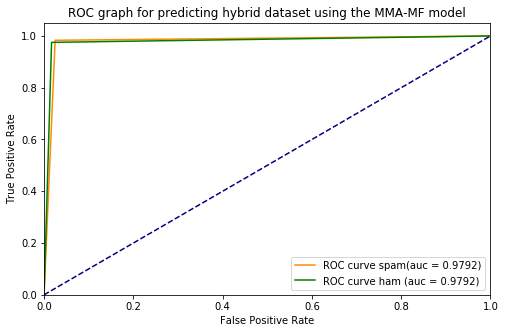

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6624 - acc: 0.6188
Epoch 2/30
960/960 [==============================] - 0s 155us/step - loss: 0.6030 - acc: 0.8615
Epoch 3/30
960/960 [==============================] - 0s 156us/step - loss: 0.5445 - acc: 0.9453
Epoch 4/30
960/960 [==============================] - 0s 144us/step - loss: 0.4810 - acc: 0.9818
Epoch 5/30
960/960 [==============================] - 0s 189us/step - loss: 0.4153 - acc: 0.9818
Epoch 6/30
960/960 [==============================] - 0s 164us/step - loss: 0.3504 - acc: 0.9818
Epoch 7/30
960/960 [==============================] - 0s 176us/step - loss: 0.2895 - acc: 0.9818
Epoch 8/30
960/960 [==============================] - 0s 170us/step - loss: 0.2366 - acc: 0.9818
Epoch 9/30
960/960 [==============================] - 0s 138us/step - loss: 0.1951 - acc: 0.9818
Epoch 10/30
960/960 [==============================] - 0s 199us/step - loss: 0.1642 - acc: 0.9818
Epoch 11/30
960/960 [==========

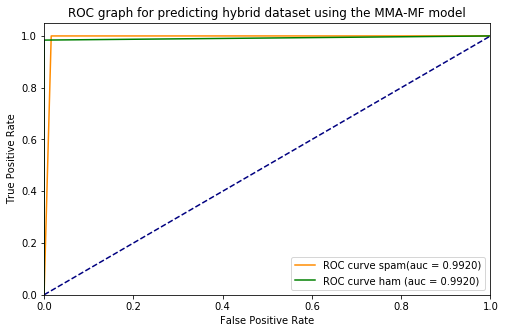

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6629 - acc: 0.5719
Epoch 2/30
960/960 [==============================] - 0s 160us/step - loss: 0.6116 - acc: 0.9245
Epoch 3/30
960/960 [==============================] - 0s 151us/step - loss: 0.5665 - acc: 0.9859
Epoch 4/30
960/960 [==============================] - 0s 153us/step - loss: 0.5180 - acc: 0.9865
Epoch 5/30
960/960 [==============================] - 0s 204us/step - loss: 0.4622 - acc: 0.9865
Epoch 6/30
960/960 [==============================] - 0s 183us/step - loss: 0.3986 - acc: 0.9865
Epoch 7/30
960/960 [==============================] - 0s 185us/step - loss: 0.3338 - acc: 0.9865
Epoch 8/30
960/960 [==============================] - 0s 170us/step - loss: 0.2737 - acc: 0.9865
Epoch 9/30
960/960 [==============================] - ETA: 0s - loss: 0.2232 - acc: 0.989 - 0s 208us/step - loss: 0.2223 - acc: 0.9865
Epoch 10/30
960/960 [==============================] - 0s 171us/step - loss: 0.1822 - acc: 

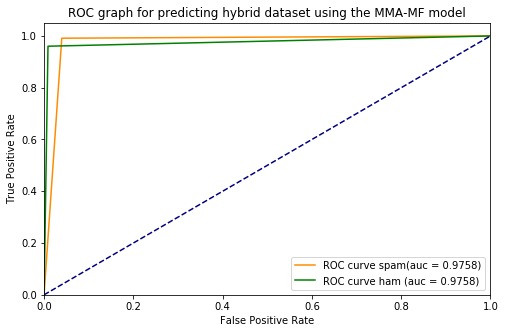

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.7142 - acc: 0.4891
Epoch 2/30
960/960 [==============================] - 0s 150us/step - loss: 0.6684 - acc: 0.6526
Epoch 3/30
960/960 [==============================] - 0s 177us/step - loss: 0.6290 - acc: 0.8042
Epoch 4/30
960/960 [==============================] - 0s 155us/step - loss: 0.5871 - acc: 0.9677
Epoch 5/30
960/960 [==============================] - 0s 204us/step - loss: 0.5375 - acc: 0.9818
Epoch 6/30
960/960 [==============================] - 0s 192us/step - loss: 0.4808 - acc: 0.9818
Epoch 7/30
960/960 [==============================] - 0s 185us/step - loss: 0.4189 - acc: 0.9818
Epoch 8/30
960/960 [==============================] - 0s 201us/step - loss: 0.3558 - acc: 0.9818
Epoch 9/30
960/960 [==============================] - 0s 214us/step - loss: 0.2956 - acc: 0.9823
Epoch 10/30
960/960 [==============================] - 0s 171us/step - loss: 0.2438 - acc: 0.9823
Epoch 11/30
960/960 [==========

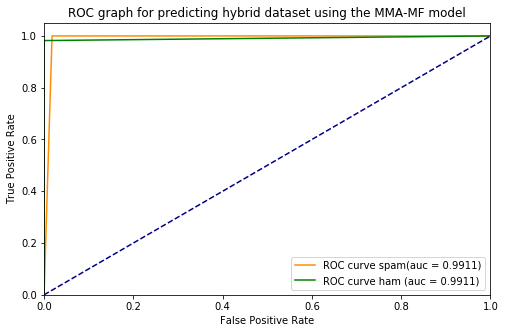

Epoch 1/30
960/960 [==============================] - 3s 3ms/step - loss: 0.6815 - acc: 0.5526
Epoch 2/30
960/960 [==============================] - 0s 155us/step - loss: 0.6403 - acc: 0.6672
Epoch 3/30
960/960 [==============================] - 0s 183us/step - loss: 0.5996 - acc: 0.9542
Epoch 4/30
960/960 [==============================] - 0s 190us/step - loss: 0.5549 - acc: 0.9833
Epoch 5/30
960/960 [==============================] - 0s 139us/step - loss: 0.5024 - acc: 0.9839
Epoch 6/30
960/960 [==============================] - 0s 195us/step - loss: 0.4416 - acc: 0.9844
Epoch 7/30
960/960 [==============================] - 0s 216us/step - loss: 0.3762 - acc: 0.9844
Epoch 8/30
960/960 [==============================] - 0s 186us/step - loss: 0.3108 - acc: 0.9844
Epoch 9/30
960/960 [==============================] - 0s 198us/step - loss: 0.2534 - acc: 0.9844
Epoch 10/30
960/960 [==============================] - 0s 191us/step - loss: 0.2066 - acc: 0.9854
Epoch 11/30
960/960 [==========

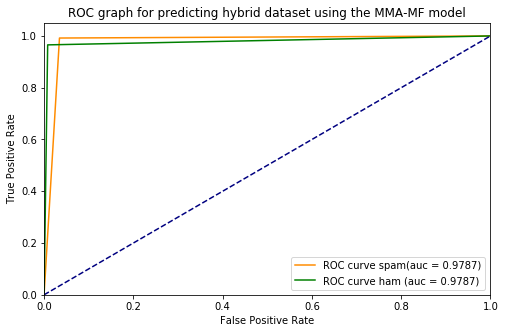

***************************Accuracy****************************
The all of acc score:  [97.91666666666666, 99.16666666666667, 97.5, 99.16666666666667, 97.91666666666666]
The average score: 98.3333% (+/- 0.6972%)
---------------------------F1-Score-----------------------------
The all of f1_scores score:  [0.9791663049705723, 0.9916573971078977, 0.9749721913236931, 0.9916195265032474, 0.9791228100697646]
The average score: 0.9833% (+/- 0.0070%)
+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++
The all of recall_scores score:  [0.9791999444405861, 0.992, 0.9757727652464494, 0.9910714285714286, 0.978726362625139]
The average score: 0.9834% (+/- 0.0068%)


In [14]:
from keras.optimizers import SGD,Adam
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train):
    #accuracy_scores = []
    
    model = Sequential()  
    model.add(Dense(64, input_shape=(4,)))
    model.add(Activation('relu'))  
    model.add(Dense(32))
    model.add(Activation('relu'))  
    model.add(Dense(2))
    model.add(Activation('sigmoid')) 
    sgd = SGD(lr=0.01)
    model.compile(loss='binary_crossentropy',  optimizer=sgd,
                  metrics=['accuracy'])  

    model.fit(hybrid_data[train], y_text_train[train], batch_size=16, epochs=30,verbose=1)
    model.save("/home/aqts/yangHong/first-spam-experiment/h5_model/hybrid_for_equal"+str(flag_nn)+".h5")
    
    # 评估模型
    # accuracy
    scores = model.evaluate(hybrid_data[test], y_text_train[test], verbose=0)
    cvscores.append(scores[1]*100)
    y_pred_score=y_pred=model.predict(hybrid_data[test], 16)
    #get precision
    for i in range(len(y_pred)):
        if(y_pred[i][0]>0.5):
            y_pred[i][0]=1
        else:
            y_pred[i][0]=0
        if(y_pred[i][1]>0.5):
            y_pred[i][1]=1
        else:
            y_pred[i][1]=0
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train[test],y_pred,average = 'macro'))
    #get auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_text_train[test][:, i], y_pred_score[:, i])    
        roc_auc[i] = auc(fpr[i], tpr[i])   

    # #Plot of a ROC curve for a specific class
    plt.rcParams['figure.figsize']=(8,5)
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve spam(auc = %0.4f)' % roc_auc[1])
    plt.plot(fpr[0], tpr[0], color='green', label='ROC curve ham (auc = %0.4f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC graph for predicting hybrid dataset using the MMA-MF model')
    plt.legend(loc="lower right")
    plt.savefig("/home/aqts/yangHong/first-spam-experiment/experiment_result_roc/ROC_graph_for_hybrid_dataset_equal"+str(flag_nn)+".png")
    plt.show()
    flag_nn=flag_nn+1

print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

In [15]:
from sklearn.metrics import classification_report
from sklearn import preprocessing   
import numpy as np
# y_hybrid_pred = model.predict(hybrid_data_test,batch_size=32, verbose=0)
y_text_train_new=[]
for i in range(len(y_text_train)):
    if(y_text_train[i][0]>0.5):
        y_text_train_new.append(1)
    else:
        y_text_train_new.append(0)
y_text_train_new=np.array(y_text_train_new)
print(y_text_train_new.shape)

(1200,)


In [16]:
'''
SVM=Support Vector Machine 是支持向量
SVC=Support Vector Classification就是支持向量机用于分类，
SVC=Support Vector Regression.就是支持向量机用于回归分析
'''

'''
算法（python-sklearn）
SVM模型的几种
svm.LinearSVC Linear Support Vector Classification.
svm.LinearSVR Linear Support Vector Regression.
svm.NuSVC Nu-Support Vector Classification.
svm.NuSVR Nu Support Vector Regression.
svm.OneClassSVM Unsupervised Outlier Detection.
svm.SVC C-Support Vector Classification.
svm.SVR Epsilon-Support Vector Regression.
'''
#svm  参数选择 开始调优使用GridSearchCV找到,最优参数

# X, y = load_digits(return_X_y = True)
parameters = {'gamma': [0,0.001, 0.01], 'C':[1,5,10]}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0)
gs.fit(hybrid_data, y_text_train_new) #Run fit with all sets of parameters.
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)
# gs.fit(hybrid_data, y_text_train, batch_size=32, epochs=20,validation_split=0.2)

最优参数:  {'C': 1, 'gamma': 0.001}
最佳性能:  0.9841666666666666


In [23]:
# svc get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    svc_model=SVC(C=1,gamma= 1)     #SVC(gamma=10,C=1)
    svc_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = svc_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=svc_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))


print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       119
           1       0.98      0.98      0.98       121

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       0.99      0.98      0.99       125

   micro avg       0.99      0.99      0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       114
           1       0.99      0.96      

In [18]:
#knn 参数选择 开始调优使用GridSearchCV找到,最优参数
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#设置k的范围
k_range = list(range(1,5))
leaf_range = list(range(1,3))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(KNeighborsClassifier(),param_gridknn,cv=5,scoring='accuracy',verbose=1)
gridKNN.fit(hybrid_data, y_text_train_new)
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best score is: 0.9841666666666666
best params are: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    5.4s finished


In [20]:
# knn get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    knn_model=KNeighborsClassifier(algorithm="auto",leaf_size=1,n_neighbors=1,weights="uniform")     #SVC(gamma=10,C=1)
    knn_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = knn_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=knn_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))


print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       119
           1       0.98      0.98      0.98       121

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.97      0.98      0.98       125

   micro avg       0.97      0.97      0.97       240
   macro avg       0.98      0.97      0.97       240
weighted avg       0.98      0.97      0.97       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.98      0.98      

In [24]:
from sklearn.model_selection import GridSearchCV #网格搜索模块
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()#候选参数：树的数量，最大树深，选择的变量树
parameters = {'n_estimators':np.array([25,50,100]),'max_depth':np.array([2,3,4,5,6,7,8])}#网格参数搜索，输入之前的模型流程pipe_process,候选参数parameters，并且设置5折交叉验证
gs_RF = GridSearchCV(clf,parameters,verbose=2,refit=True,cv=5) #设置备选参数组
gs_RF.fit(hybrid_data, y_text_train_new) #模型训练过程
# print(gs_RF.best_params_,gs_RF.best_score_) #查看最佳参数和评分（准确度）
print('best score is:',str(gs_RF.best_score_))
print('best params are:',str(gs_RF.best_params_))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ..................... max_depth=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ..................... max_depth=2, n_estimators=50, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .

[CV] ..................... max_depth=6, n_estimators=25, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV] ..................... max_depth=6, n_estimators=25, total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV] ..................... max_depth=6, n_estimators=25, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] ..................... max_depth=6, n_estimators=50, total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   15.6s finished


In [25]:
# random forest get performance
seed = 42
np.random.seed(seed)

# 定义 K-fold 交叉验证 参数
kfold= KFold(n_splits=5, shuffle=True, random_state=seed)
n_classes=2
flag_nn=1
f1_scores=[]
recall_scores=[]
cvscores=[]
for train, test in kfold.split(hybrid_data, y_text_train_new):
    rfc_model=RandomForestClassifier(max_depth=2,n_estimators=25)     #SVC(gamma=10,C=1)
    rfc_model.fit(hybrid_data[train],y_text_train_new[train])
    
    # 评估模型
    # accuracy
    scores = rfc_model.score(hybrid_data[test], y_text_train_new[test])
    cvscores.append(scores*100)
    y_pred_score=y_pred=rfc_model.predict(hybrid_data[test])
    print("---------------------------Precision-----------------------------")
    print(classification_report(y_text_train_new[test],y_pred))
    #f1-score
    f1_scores.append(f1_score(y_text_train_new[test],y_pred,average = 'macro'))
    #recall-score
    recall_scores.append(recall_score(y_text_train_new[test],y_pred,average = 'macro'))

print("***************************Accuracy****************************")
print("The all of acc score: " ,(cvscores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("---------------------------F1-Score-----------------------------")
print("The all of f1_scores score: " ,(f1_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
print("+++++++++++++++++++++++++++Recall-Score+++++++++++++++++++++++++")
print("The all of recall_scores score: " ,(recall_scores))
print("The average score: %.4f%% (+/- %.4f%%)" % (np.mean(recall_scores), np.std(recall_scores)))

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       119
           1       0.98      0.98      0.98       121

   micro avg       0.98      0.98      0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       115
           1       0.98      0.99      0.99       125

   micro avg       0.99      0.99      0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

---------------------------Precision-----------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       114
           1       0.99      0.96      

In [ ]:
from sklearn.model_selection import GridSearchCV #网格搜索模块
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier()#候选参数：树的数量，最大树深，选择的变量树
parameters = {'radius':np.array([80,160,320]),"algorithm":["auto","ball_tree","kd_tree", "brute"]}#网格参数搜索，输入之前的模型流程pipe_process,候选参数parameters，并且设置5折交叉验证
gs_rnc = GridSearchCV(rnc,parameters,verbose=2,refit=True,cv=5) #设置备选参数组
gs_rnc.fit(hybrid_data, y_text_train_2) #模型训练过程
# print(gs_RF.best_params_,gs_RF.best_score_) #查看最佳参数和评分（准确度）
print('best score is:',str(gs_rnc.best_score_))
print('best params are:',str(gs_rnc.best_params_))